##### AT - Dados para Machine Learning: Feature Engineering

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, PowerTransformer

##### Questão 2. Breast Cancer Dataset

In [59]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# (a) - Identifique as features contínuas

print("Features contínuas do Breast Cancer Dataset:")
print(df.columns.tolist())

Features contínuas do Breast Cancer Dataset:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


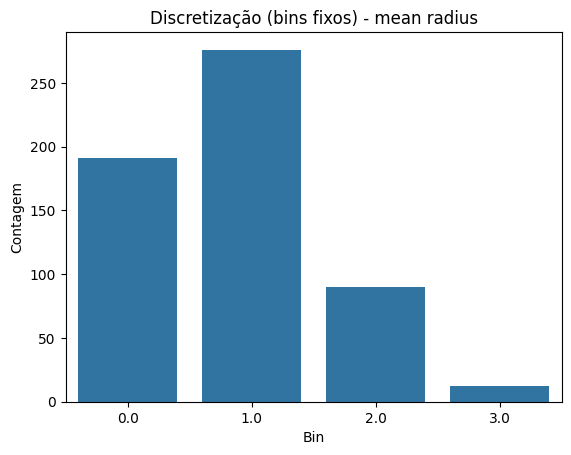

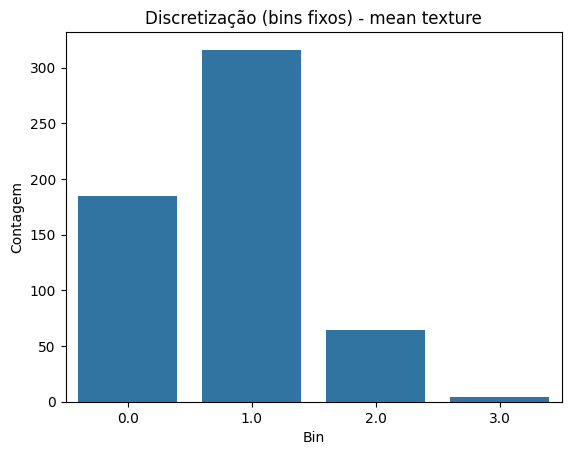

In [61]:
# (b) - Discretização por bins fixos

features_b = ['mean radius', 'mean texture']
discretizer_fixed = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
df_b = df.copy()
df_b[features_b] = discretizer_fixed.fit_transform(df[features_b])

# Visualização da discretização (bins fixos)
for feature in features_b:
    sns.countplot(x=df_b[feature])
    plt.title(f'Discretização (bins fixos) - {feature}')
    plt.xlabel('Bin')
    plt.ylabel('Contagem')
    plt.show()

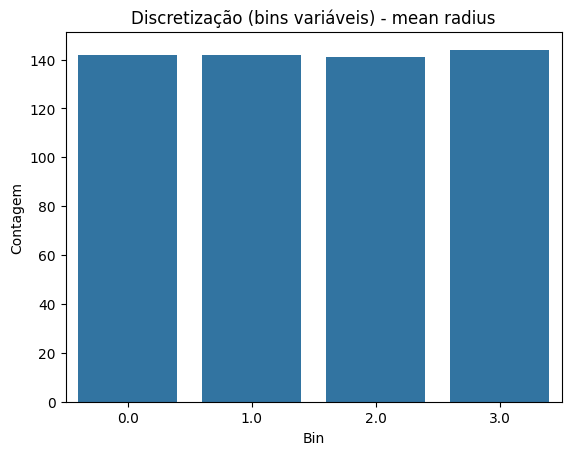

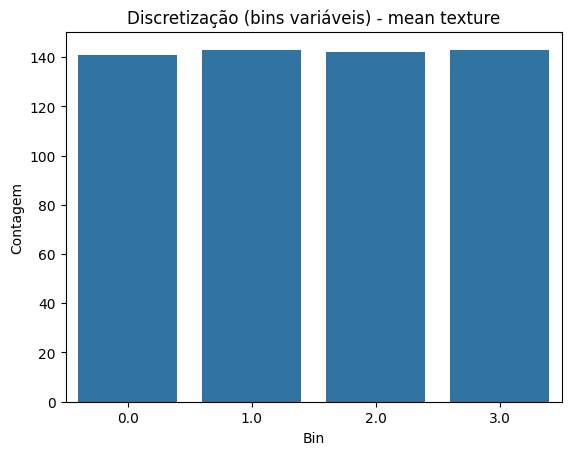

In [62]:
# (c) - Discretização por bins variáveis

features_c = ['mean radius', 'mean texture']
discretizer_variable = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df_c = df.copy()
df_c[features_c] = discretizer_variable.fit_transform(df[features_c])

# Visualização da discretização (bins variáveis)
for feature in features_c:
    sns.countplot(x=df_c[feature])
    plt.title(f'Discretização (bins variáveis) - {feature}')
    plt.xlabel('Bin')
    plt.ylabel('Contagem')
    plt.show()

##### Questão 3. Breast Cancer Dataset

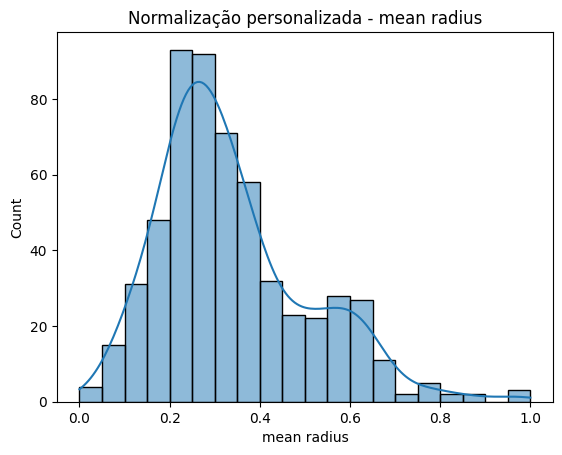

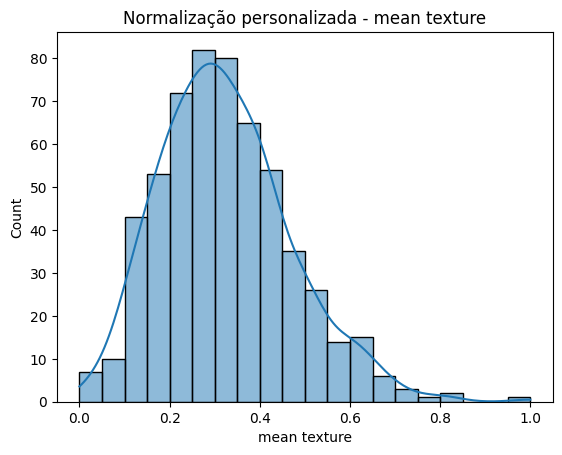

In [63]:
# (a) - Normalização com FunctionTransformer (min-max scaling)
def min_max_normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

transformer = FunctionTransformer(min_max_normalize)
df_norm = pd.DataFrame(transformer.fit_transform(df), columns=df.columns)

# Visualização
for feature in ['mean radius', 'mean texture']:
    sns.histplot(df_norm[feature], bins=20, kde=True)
    plt.title(f'Normalização personalizada - {feature}')
    plt.show()

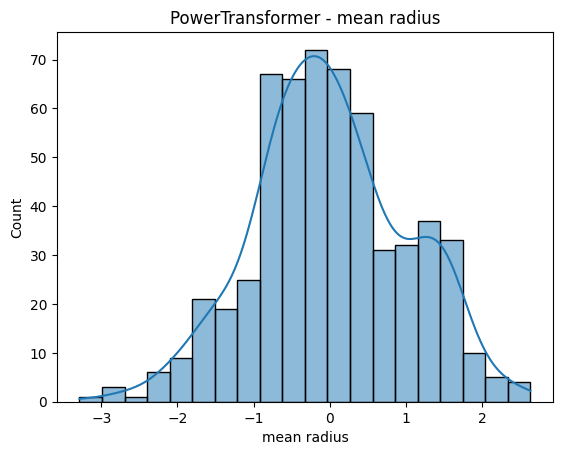

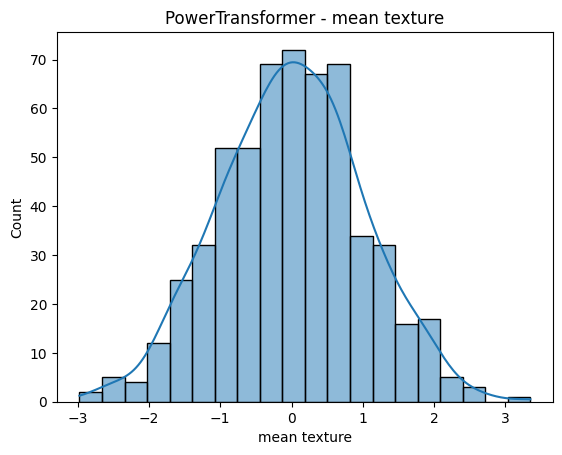

In [64]:
# (b) - Normalização com PowerTransformer
power_transformer = PowerTransformer()
df_power = pd.DataFrame(power_transformer.fit_transform(df), columns=df.columns)

# Visualização
for feature in ['mean radius', 'mean texture']:
    sns.histplot(df_power[feature], bins=20, kde=True)
    plt.title(f'PowerTransformer - {feature}')
    plt.show()

##### Questão 4. Breast Cancer Dataset

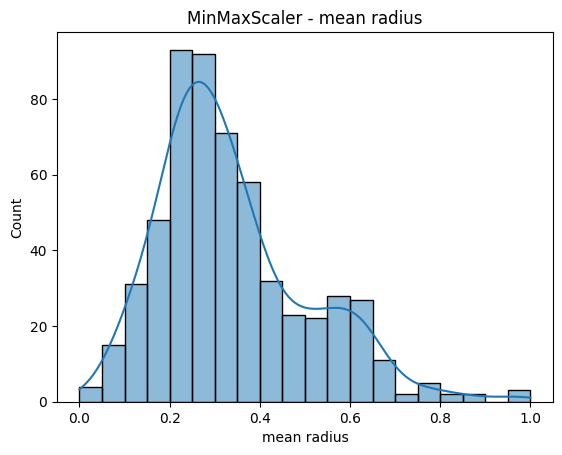

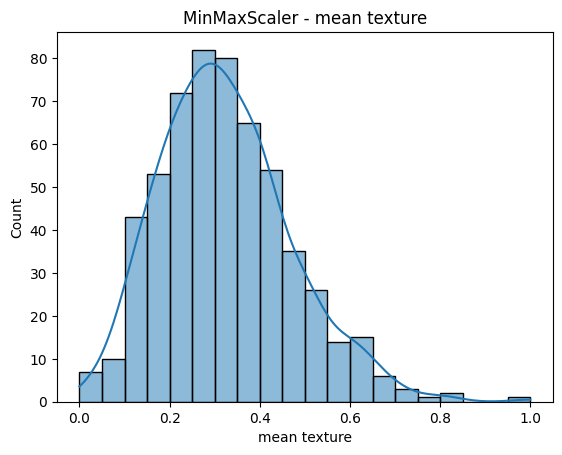

In [65]:
# (a) - Normalização com MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

# Visualização
for feature in ['mean radius', 'mean texture']:
    sns.histplot(df_minmax[feature], bins=20, kde=True)
    plt.title(f'MinMaxScaler - {feature}')
    plt.show()

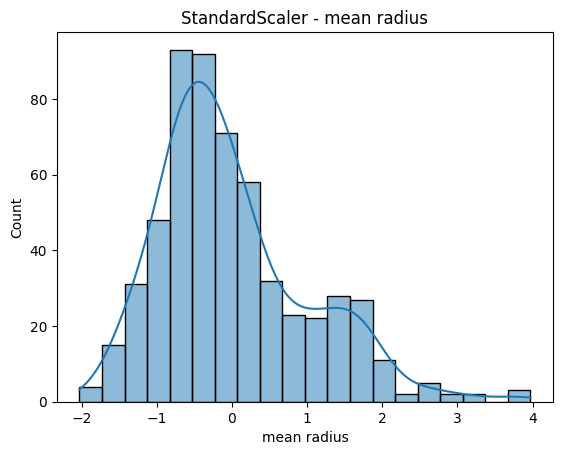

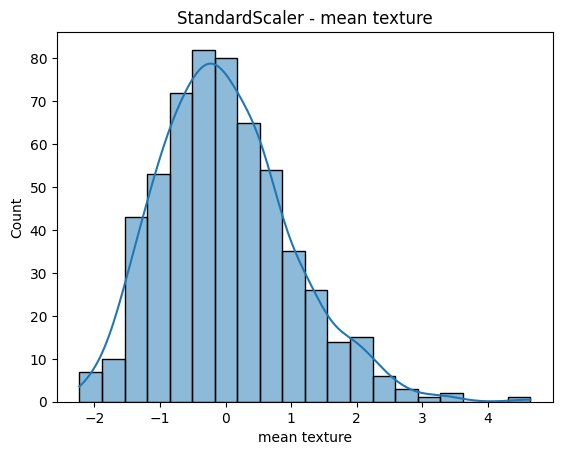

In [66]:
# (b) - Escalonamento padrão com StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

# Visualização
for feature in ['mean radius', 'mean texture']:
    sns.histplot(df_standard[feature], bins=20, kde=True)
    plt.title(f'StandardScaler - {feature}')
    plt.show()

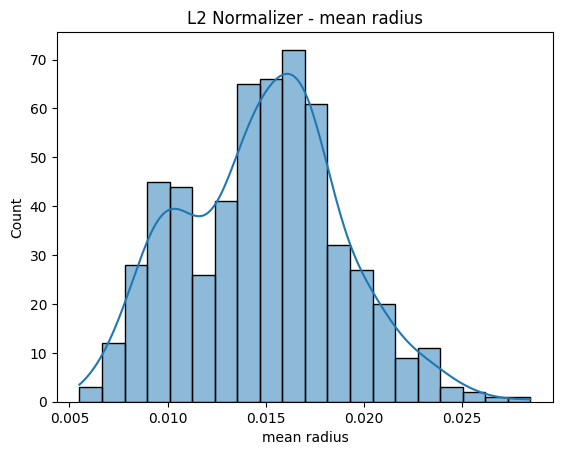

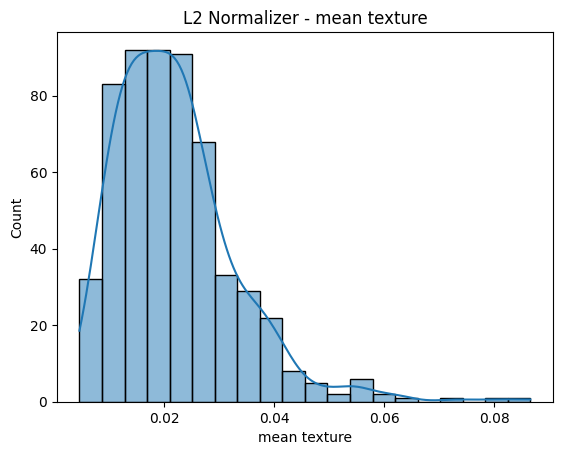

In [67]:
# (c) - Regularização com norma L2
from sklearn.preprocessing import Normalizer

l2_normalizer = Normalizer(norm='l2')
df_l2 = pd.DataFrame(l2_normalizer.fit_transform(df), columns=df.columns)

# Visualização
for feature in ['mean radius', 'mean texture']:
    sns.histplot(df_l2[feature], bins=20, kde=True)
    plt.title(f'L2 Normalizer - {feature}')
    plt.show()

In [68]:
# (d) - É possível aplicar simultaneamente dois ou mesmo os três métodos dos itens anteriores? Explique.

Sim, é possível aplicar dois ou até os três métodos (MinMaxScaler, StandardScaler e normalização com norma L2) de forma combinada no mesmo dataset. Isso porque cada técnica atua em aspectos diferentes dos dados. O MinMaxScaler e o StandardScaler transformam as features individualmente, ajustando seus valores em termos de escala e média/desvio padrão. Enquanto a normalização L2 age sobre cada linha (amostra) como um vetor no espaço, ajustando seu comprimento para 1 sem que altere a sua direção. Como essas transformações não são mutuamente exclusivas, podemos aplicá-las em sequência, o importante é pensar na ordem de aplicação, porque ela vai influenciar no resultado final dependendo do objetivo do modelo.

##### Questão 5. Large Movie Review Dataset

In [69]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
# Função para carregar as resenhas do diretório
def load_reviews(folder):
    data = []
    for label in ['pos', 'neg']:
        path = os.path.join(folder, label)
        for file in os.listdir(path):
            if file.endswith('.txt'):
                with open(os.path.join(path, file), encoding='utf-8') as f:
                    text = f.read()
                    data.append({'review': text, 'label': 1 if label == 'pos' else 0})
    return pd.DataFrame(data)

# Carregando o dataset
df_reviews = load_reviews('aclImdb/train')
df_reviews.sample(5)

,review,label
12176,Far richer in texture and character than even ...,1
24628,Dr. Seuss would sure be mad right now if he wa...,0
1855,I first saw this movie on cable about 5 years ...,1
2986,One of the things about the film that warmed m...,1
5730,"After, I watched the films... I thought, ""Why ...",1


In [71]:
# (a) - Remover stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.lower().split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df_reviews['clean_a'] = df_reviews['review'].apply(remove_stopwords)
df_reviews[['review', 'clean_a']].sample(5)

,review,clean_a
24435,This movie is a great example of how even some...,movie great example even funny jokes go terrib...
18031,"The more I analyze this film, the worse it bec...","analyze film, worse becomes. first all, motiva..."
12924,This is one of the few episodes (if not the on...,one episodes (if one) indisputable error story...
644,Neither the total disaster the UK critics clai...,neither total disaster uk critics claimed misu...
22301,"This movie is an abomination, and its making s...","movie abomination, making considered capital c..."


In [72]:
# (b) - Stemming
stemmer = PorterStemmer()

def apply_stemming(text):
    tokens = text.split()
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)

df_reviews['clean_b'] = df_reviews['clean_a'].apply(apply_stemming)
df_reviews[['clean_a', 'clean_b']].sample(5)

,clean_a,clean_b
13533,high intellectual pretensions.the main lead in...,high intellectu pretensions.th main lead inten...
12626,"why, o' why! ...did pick one up? well... neede...","why, o' why! ...did pick one up? well... need ..."
925,"director/star clint eastwood's ""sudden impact""...","director/star clint eastwood' ""sudden impact"" ..."
3261,"ever wondered make porn plot, watch dream ques...","ever wonder make porn plot, watch dream quest...."
6291,came back montreal premiere zero day...and sur...,came back montreal premier zero day...and surp...


In [73]:
# (c) - Lemmatization
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    tokens = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

df_reviews['clean_c'] = df_reviews['clean_a'].apply(apply_lemmatization)
df_reviews[['clean_a', 'clean_c']].sample(5)

,clean_a,clean_c
23167,commentary nothing political sentiments found ...,commentary nothing political sentiment found f...
19216,seems evident adaptation not. leave plot behin...,seems evident adaptation not. leave plot behin...
6891,modern viewers know little film primarily mode...,modern viewer know little film primarily model...
11039,"buddy entertaining family film set time ""human...","buddy entertaining family film set time ""human..."
16980,"batman mystery batwoman, is, word, stale. <br ...","batman mystery batwoman, is, word, stale. <br ..."


In [74]:
# (d) - Bag-of-Words nas resenhas do stemming
vectorizer_bow = CountVectorizer(max_features=1000)
X_bow = vectorizer_bow.fit_transform(df_reviews['clean_b'])

df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
df_bow.head()

,10,20,30,50,70,80,90,abl,about,absolut,...,wrong,wrote,year,years,yes,yet,york,you,young,zombi
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# (e) - Bag-of-n-Grams (bigrams) nas resenhas do lemmatization
vectorizer_bigram = CountVectorizer(ngram_range=(2,2), max_features=1000)
X_bigram = vectorizer_bigram.fit_transform(df_reviews['clean_c'])

df_bigram = pd.DataFrame(X_bigram.toarray(), columns=vectorizer_bigram.get_feature_names_out())
df_bigram.head()

,10 10,10 br,10 minute,10 year,15 minute,15 year,20 minute,20 year,20th century,30 minute,...,year earlier,year later,year old,yet another,york city,you br,young boy,young girl,young man,young woman
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Questão 6. Large Movie Review Dataset

In [76]:
# (a) - Redimensionamento com TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Utilizado texto pré-processado na 5(c) (clean_c = lemmatized + stopwords removidas)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df_reviews['clean_c'])

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf.head()

,10,20,30,50,70,80,90,able,about,absolutely,...,wrong,wrote,year,years,yes,yet,york,you,young,zombie
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.057528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.106609,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# (b) - Modelo de classificação com Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_reviews['label'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8542

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2485
           1       0.85      0.87      0.86      2515

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



##### Questão 7. Powerlifting Database

In [78]:
df_power = pd.read_csv('archive/openpowerlifting.csv')
df_power.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [79]:
categorical_cols = ['Sex', 'Equipment', 'Division']

# Visualização das colunas categóricas
for col in categorical_cols:
    print(f"{col}: {df_power[col].unique()}")

Sex: ['F' 'M']
Equipment: ['Wraps' 'Single-ply' 'Raw' 'Multi-ply' 'Straps']
Division: ['Mst 45-49' 'Mst 40-44' 'Open Senior' ... 'Pro HW' 'Pro Heavy'
 'Pro Light']


In [80]:
# (a) — One-hot Encoding

df_onehot = pd.get_dummies(df_power[categorical_cols], drop_first=False)
df_onehot.head()

,Sex_F,Sex_M,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Straps,Equipment_Wraps,Division_-100kg,Division_11-12R,Division_12*13,...,Division_wsmp,Division_wteen,Division_youth,Division_yth,Division_М1 40-49,Division_М1 41-49,Division_М2 50-59,Division_М3 60-69,Division_М4 70-79,Division_Оpen 24-39
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# (b) — Dummy Coding

# Igual ao one-hot, mas remove uma categoria de cada variável
df_dummy = pd.get_dummies(df_power[categorical_cols], drop_first=True)
df_dummy.head()

,Sex_M,Equipment_Raw,Equipment_Single-ply,Equipment_Straps,Equipment_Wraps,Division_11-12R,Division_12*13,Division_12-13,Division_13-14R,Division_13-15,...,Division_wsmp,Division_wteen,Division_youth,Division_yth,Division_М1 40-49,Division_М1 41-49,Division_М2 50-59,Division_М3 60-69,Division_М4 70-79,Division_Оpen 24-39
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# Comparando shapes
print("Shape One-hot:", df_onehot.shape)
print("Shape Dummy:", df_dummy.shape)

Shape One-hot: (386414, 4253)
Shape Dummy: (386414, 4250)


In [83]:
# (c) — Effect Coding

def effect_coding(df, column):
    dummies = pd.get_dummies(df[column])
    dummies = dummies.iloc[:, :-1]
    dummies = dummies * 2 - 1
    return dummies

df_effect_list = [effect_coding(df_power, col) for col in categorical_cols]
df_effect = pd.concat(df_effect_list, axis=1)
df_effect.head()

,F,Multi-ply,Raw,Single-ply,Straps,-100kg,11-12R,12*13,12-13,13-14R,...,wsm2,wsmp,wteen,youth,yth,М1 40-49,М1 41-49,М2 50-59,М3 60-69,М4 70-79
0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [84]:
# Comparando shapes
print("Shape Effect coding:", df_effect.shape)

Shape Effect coding: (386414, 4250)


##### Questão 8. Powerlifting Database

Realizar a vetorização de variáveis categóricas de um dataset é importante para transformar dados qualitativos em uma forma numérica que os modelos de machine learning consigam interpretar.

Por exemplo, podemos citar as seguintes vantagens:
- Permite que modelos matemáticos trabalhem com dados categóricos.
- Representa as categorias de forma sistemática e automatizada.
- Abre espaço para modelos lineares capturarem relações entre categorias e o target.

Todavia, também pode-se citar algumas desvantagens, tais quais:
- Pode gerar um número muito grande de colunas, especialmente com muitas categorias.
- Em vetorizadores como one-hot, cria-se muita esparsidade, o que pode prejudicar o desempenho do modelo e exigir mais memória.
- Algumas técnicas, como one-hot, não capturam relação de ordem entre categorias.

Logo,, em datasets grandes como o Powerlifting Database, técnicas como feature hashing ou bin counting podem ajudar a compactar as representações.

In [85]:
# (a i) — Compacte usando Feature Hashing
from sklearn.feature_extraction import FeatureHasher

categorical_cols = ['Sex', 'Equipment', 'Division']
X_hash_input = df_power[categorical_cols].astype(str).to_dict(orient='records')

# Aplica;cão do Feature Hashing
hasher = FeatureHasher(n_features=10, input_type='dict')
X_hash = hasher.transform(X_hash_input)

df_hash = pd.DataFrame(X_hash.toarray())
df_hash.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [86]:
# (a ii) — Compacte usando Bin Counting
from sklearn.feature_extraction.text import CountVectorizer

df_power['cat_combined'] = df_power[categorical_cols].astype(str).agg(' '.join, axis=1)

# Aplicação do CountVectorizer para bin counting
vectorizer = CountVectorizer()
X_bin_count = vectorizer.fit_transform(df_power['cat_combined'])

df_bin_count = pd.DataFrame(X_bin_count.toarray(), columns=vectorizer.get_feature_names_out())
df_bin_count.head()

,10,100kg,105,10r,11,110kg,114,12,123,12r,...,y3,y5,youth,yrs,yth,м1,м2,м3,м4,оpen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# (a iii) — Analise os resultados obtidos nos itens (i) e (ii)

No Feature Hashing, conseguimos compactar as categorias em um número fixo de colunas (no caso, 10), independentemente da quantidade de categorias originais. Isso ajuda bastante a reduzir a dimensionalidade e o uso de memória, mas tem o risco de colisões, ou seja, categorias diferentes podem acabar sendo representadas na mesma coluna do hash, o que pode confundir o modelo em alguns casos.

No Bin Counting, cada combinação de categorias gera sua própria coluna, o que preserva a informação completa sem colisões, mas pode resultar em uma matriz muito maior e esparsa. Isso pode acabar impactando o desempenho e o consumo de memória, principalmente em datasets com muitas combinações únicas de categorias.

Em resumo, o Feature Hashing é vantajoso quando queremos reduzir a dimensionalidade e aceitamos o risco de colisões, enquanto o Bin Counting mantém a fidelidade dos dados, mas pode gerar alta dimensionalidade.

##### Questão 10. Aplicar PCA e apresentar resultados graficamente

In [88]:
from sklearn.decomposition import PCA

df_lung = pd.read_csv('LungCancerDataset.csv')
df_lung.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


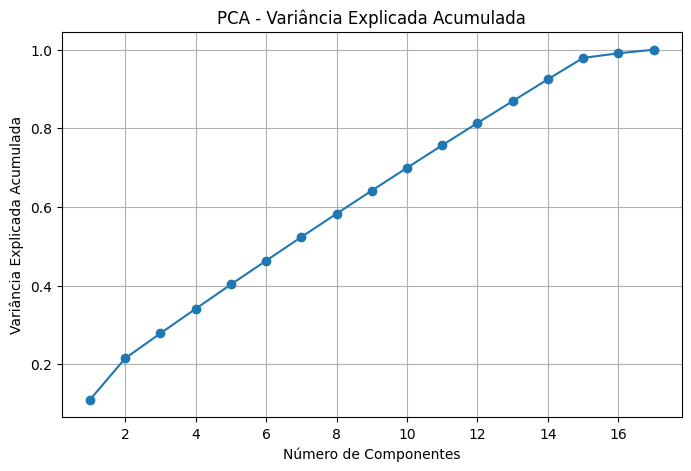

In [89]:
numeric_cols = df_lung.select_dtypes(include=['int64', 'float64']).columns
X = df_lung[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicação do PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada Acumulada')
plt.grid(True)
plt.show()

In [90]:
# Variância explicada por componente
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Componente {i+1}: {var:.4f} da variância explicada")

Componente 1: 0.1097 da variância explicada
Componente 2: 0.1052 da variância explicada
Componente 3: 0.0636 da variância explicada
Componente 4: 0.0624 da variância explicada
Componente 5: 0.0619 da variância explicada
Componente 6: 0.0605 da variância explicada
Componente 7: 0.0604 da variância explicada
Componente 8: 0.0591 da variância explicada
Componente 9: 0.0589 da variância explicada
Componente 10: 0.0578 da variância explicada
Componente 11: 0.0576 da variância explicada
Componente 12: 0.0564 da variância explicada
Componente 13: 0.0558 da variância explicada
Componente 14: 0.0556 da variância explicada
Componente 15: 0.0544 da variância explicada
Componente 16: 0.0116 da variância explicada
Componente 17: 0.0091 da variância explicada
